In [1]:
!pip install --user tensorflow

In [2]:
 !pip3 show tensorflow

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\dsl-187\appdata\roaming\python\python38\site-packages
Requires: tensorflow-intel
Required-by: 


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, GlobalAveragePooling2D

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('OCT2017_\\train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory('OCT2017_\\val',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory('OCT2017_\\test',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [10]:
from tensorflow.keras.optimizers import SGD
base_model = VGG19(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='elu')(x)
predictions = Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
2609/2609 [==============================] - 39286s 15s/step - loss: 0.5687 - accuracy: 0.8029 - val_loss: 0.4121 - val_accuracy: 0.8438
Epoch 2/10
2609/2609 [==============================] - 23090s 9s/step - loss: 0.4507 - accuracy: 0.8347 - val_loss: 0.5049 - val_accuracy: 0.8125
Epoch 3/10
2609/2609 [==============================] - 22788s 9s/step - loss: 0.4313 - accuracy: 0.8417 - val_loss: 0.2418 - val_accuracy: 0.9375
Epoch 4/10
2609/2609 [==============================] - 22776s 9s/step - loss: 0.4130 - accuracy: 0.8493 - val_loss: 0.3534 - val_accuracy: 0.9062
Epoch 5/10
2609/2609 [==============================] - 22769s 9s/step - loss: 0.4021 - accuracy: 0.8533 - val_loss: 0.2807 - val_accuracy: 0.8750
Epoch 6/10
2609/2609 [==============================] - 22773s 9s/step - loss: 0.3940 - accuracy: 0.8563 - val_loss: 0.2096 - val_accuracy: 0.9375
Epoch 7/10
2609/2609 [==============================] - 28428s 11s/step - loss: 0.3857 - accuracy: 0.8584 - val_loss:

In [4]:
data_path='OCT2017_'
data=tf.keras.preprocessing.image_dataset_from_directory(data_path)



Found 84486 files belonging to 4 classes.


In [5]:
import os
base_dir='OCT2017_'
print("Folders in the base directory are: ", os.listdir(base_dir))

Folders in the base directory are:  ['.DS_Store', 'myproject', 'test', 'train', 'val']


In [6]:
train_dir=os.path.join(base_dir + "\\train")
print("Folders in the train directory are: ", os.listdir(train_dir))

Folders in the train directory are:  ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [7]:
test_dir=os.path.join(base_dir+"\\test")
print("Folders in the test directory are: ", os.listdir(test_dir))

Folders in the test directory are:  ['.DS_Store', 'CNV', 'DME', 'DRUSEN', 'NORMAL']


In [8]:
val_dir=os.path.join(base_dir + "\\val")
print("Folders in the validation directory are: ", os.listdir(val_dir))

Folders in the validation directory are:  ['.DS_Store', 'CNV', 'DME', 'DRUSEN', 'NORMAL']


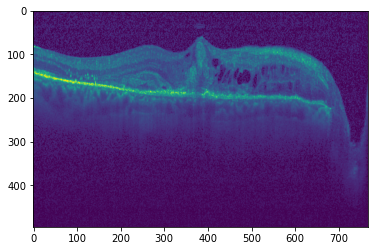

In [9]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
pic = imageio.imread(os.path.join(train_dir + '\\CNV\\CNV-13823-1.JPEG'))
#plt.figure(figsize = (5,5))
plt.imshow(pic)

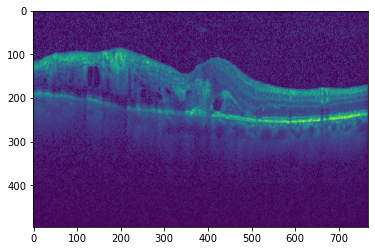

In [9]:
from matplotlib import image as mpimg
pic1=mpimg.imread(os.path.join(train_dir + '\\CNV\\CNV-13823-2.JPEG'))
plt.imshow(pic1)
plt.show()

In [10]:
vgg19 = tf.keras.applications.VGG19(
    include_top = False, 
    weights = 'imagenet', 
    input_shape = (150,150,3), 
    classes = 1000
)

In [11]:
vgg19.trainable=False

In [11]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [12]:
model1=tf.keras.models.Sequential([vgg19,
                  tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = 'same'),
                  tf.keras.layers.Conv2D(64, kernel_size = (3, 3), padding = 'same'),              
                  tf.keras.layers.Dropout(0.1),
                 tf.keras.layers.Flatten(),
                   tf.keras.layers.Dense(100),
                   tf.keras.layers.Dense(4, activation = 'softmax')
                  ])



In [13]:
metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]

In [14]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = metrics)
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 128)         589952    
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          73792     
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 100)               102500    
                                                                 
 dense_1 (Dense)             (None, 4)                 4

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (150, 150), class_mode = 'categorical', 
    batch_size = 500)

Found 83484 images belonging to 4 classes.


In [16]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    val_dir, target_size = (150, 150), class_mode = 'categorical', 
    batch_size = 16)

Found 32 images belonging to 4 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size = (150, 150), class_mode = 'categorical', 
    batch_size = 50)

Found 968 images belonging to 4 classes.


In [ ]:
history_vgg = model1.fit(
    train_generator,
    steps_per_epoch = (83484/500),
    epochs = 20,
    validation_data = test_generator,
    validation_steps = (32/16),
    verbose = 1)

Epoch 1/20
 44/166 [======>.......................] - ETA: 3:38:05 - loss: 1.4884 - accuracy: 0.6443 - auc: 0.8274 - precision: 0.6884 - recall: 0.5975